# Neural Networks

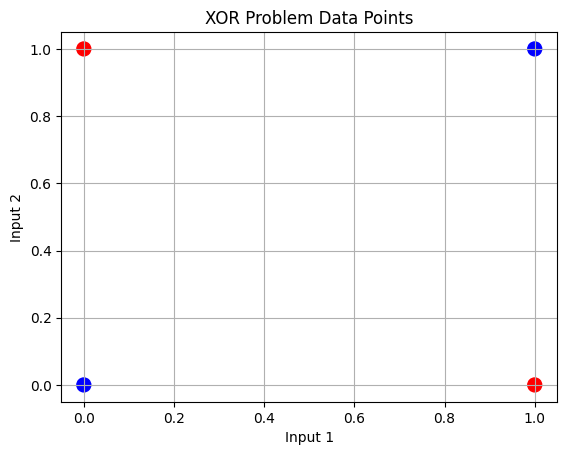

Initial Accuracy on XOR problem: 50.00%
Output Delta:
 [-0.14196164  0.04039032  0.04368541 -0.13346863]
Hidden Delta:
 [[-0.02392165 -0.01179801]
 [ 0.00524252  0.0019516 ]
 [ 0.00678973  0.00225304]
 [-0.01502089 -0.00332764]]


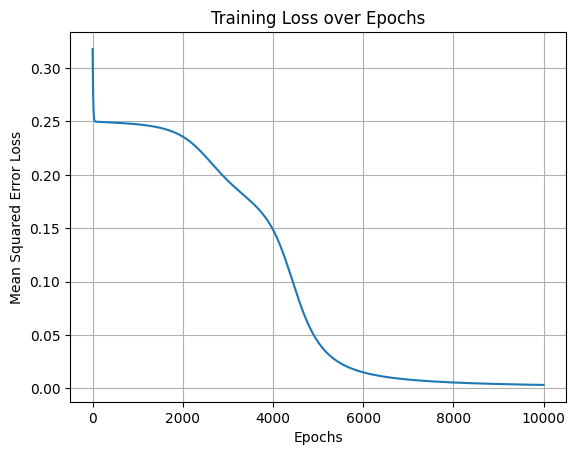

Final Accuracy on XOR problem after training: 100.00%


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

X = np.array([[0,0],[0,1],[1,0],[1,1 ]])
y = np.array([0,1,1,0])

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='bwr')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Problem Data Points')
plt.grid(True)
plt.show()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

weights_input_hidden = np.random.rand(3, 2)
weights_hidden_output = np.random.rand(3)

def forward_pass(X):
    X_bias = np.hstack((X, np.ones((X.shape[0], 1))))
    hidden_input = np.dot(X_bias, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    hidden_output_bias = np.hstack((hidden_output, np.ones((hidden_output.shape[0], 1))))
    final_input = np.dot(hidden_output_bias, weights_hidden_output)
    final_output = sigmoid(final_input)
    return final_output, hidden_output

predictions, hidden_outputs = forward_pass(X)
predicted_classes = (predictions >= 0.5).astype(int)
accuracy = accuracy_score(y, predicted_classes)
print(f'Initial Accuracy on XOR problem: {accuracy * 100:.2f}%')

def back_propagation(X, y_hat, y, hidden_outputs):
    global weights_input_hidden, weights_hidden_output
    output_error = y - y_hat
    output_delta = output_error * y_hat * (1 - y_hat)

    hidden_error = output_delta[:, np.newaxis] * weights_hidden_output[:-1]
    hidden_delta = hidden_error * hidden_outputs * (1 - hidden_outputs)

    return output_delta, hidden_delta, output_error

output_delta, hidden_delta, output_error = back_propagation(X, predictions, y, hidden_outputs)
print("Output Delta:\n", output_delta)
print("Hidden Delta:\n", hidden_delta)

def train(X, y, epochs=100, learning_rate=0.001):
    global weights_input_hidden, weights_hidden_output
    loss_history = []
    for epoch in range(epochs):
        y_hat, hidden_outputs = forward_pass(X)
        output_delta, hidden_delta, output_error = back_propagation(X, y_hat, y, hidden_outputs)

        hidden_outputs_bias = np.hstack((hidden_outputs, np.ones((hidden_outputs.shape[0], 1))))
        weights_hidden_output += learning_rate * np.dot(hidden_outputs_bias.T, output_delta)

        X_bias = np.hstack((X, np.ones((X.shape[0], 1))))
        weights_input_hidden += learning_rate * np.dot(X_bias.T, hidden_delta)

        loss = np.mean(output_error**2)
        loss_history.append(loss)

    return loss_history
loss_history = train(X, y, epochs=10000, learning_rate=0.1)
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

# Final evaluation
predictions, _ = forward_pass(X)
predicted_classes = (predictions >= 0.5).astype(int)
accuracy = accuracy_score(y, predicted_classes)
print(f'Final Accuracy on XOR problem after training: {accuracy * 100:.2f}%')





In [ ]:
# Using torch
import torch

print(torch.is_cuda_available())

import numpy as np
from torch import nn
from sklearn.metrics import accuracy_score

X = np.array([[0,0],[0,1],[1,0],[1,1 ]])
y = np.array([0,1,1,0])

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 2)
        self.layer2 = nn.Linear(2, 1)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        return x

model = NeuralNetwork()
model.to(torch.device('cuda'))
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)

X_tensor = torch.FloatTensor(X).to(torch.device('cuda'))
y_tensor = torch.FloatTensor(y).view(-1, 1).to(torch.device('cuda'))

losses = []
for epoch in range(10000):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

predicted = (model(X_tensor).detach().cpu().numpy() > 0.5).astype(int)
accuracy = accuracy_score(y, predicted)
print(f'Accuracy: {accuracy * 100}%')

ModuleNotFoundError: No module named 'torch'